In [1]:
import numpy as np
import matplotlib.pyplot as plt

linear2db = lambda x: 10*np.log10(x) 
db2linear = lambda x: np.power(10,x/10)

Assume signal with 2GHz: <br/> <br/>
$ s_n = Acos(2\pi f_{d_1}nT) + Bcos(2\pi f_{d_2}nT) + \epsilon_n$. <br/><br/>
Where T is the PRI=100us, The velocity vector is [90,100] the number of samples is N=256. <br/>
The ration between the targets are 25dB. <br/>
We would like to detect both targets therefore windowing must be applied. The SNR is infinity in this example.


In [2]:
v = np.array([90, 100])        # velocity vector of target in m/s
target_ratio = 25              # ration between targets
f_c = 2e9                      # 2GHz carrier frequency
c = 3e8                        # speed of light in m/s
T = 100e-6                     # PRI in seconds
N = 256                        # Num of samples
λ = c/f_c                      # wavelength of radar signal in meters
𝜖 = np.zeros(N)                # Noise is zero because SNR = inf
n = np.arange(N)
A = np.sqrt(db2linear(target_ratio) / (1 + db2linear(target_ratio))) * np.sqrt(2)
B = np.sqrt(1 / (1 + db2linear(target_ratio))) * np.sqrt(2)

In [3]:
f_d1 = (2*v[0]/λ)/1000
f_d2 = (2*v[1]/λ)/1000

In [4]:
s = A*np.cos(2*np.pi*f_d1*n*1.1) + B*np.cos(2*np.pi*f_d2*n*1.1) + 𝜖

Implement by your own DFT with Hamming Window

In [5]:
def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)   
    return np.dot(e, x)

def hamming(x):
    N = len(x)
    window = [0.54 - 0.46 * np.cos(2 * np.pi * i / (N - 1)) for i in range(N)]
    return x*window

def plot_freq(s,n = np.array([0]),title = ""):

    n = np.arange(len(s)) if len(n) == 1 else n
    
    plt.figure(figsize = (18, 6))
    plt.title(title)
    plt.stem(n, s, 'r',markerfmt=" ")
    plt.ylabel('Amplitude')
    plt.show()
    
def plot_signal(s,n = np.array([0]),title = ""):

    n = np.arange(len(s)) if len(n) == 1 else n
    
    plt.figure(figsize = (18, 6))
    plt.title(title)
    plt.plot(n, s, 'g')
    plt.ylabel('Amplitude')
    plt.show()

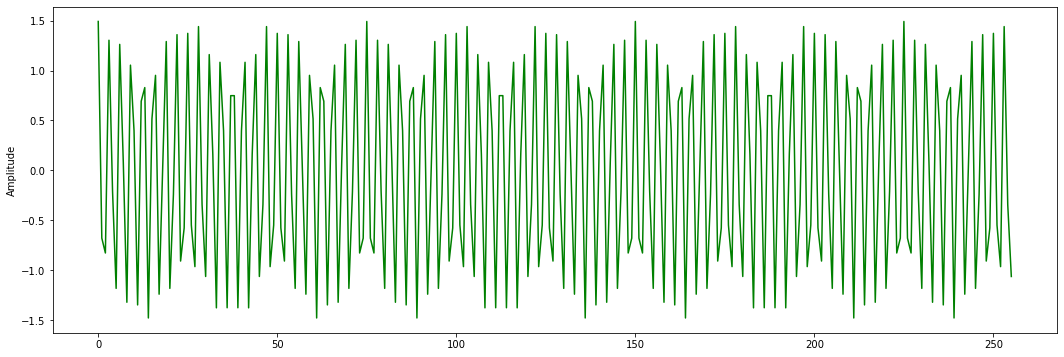

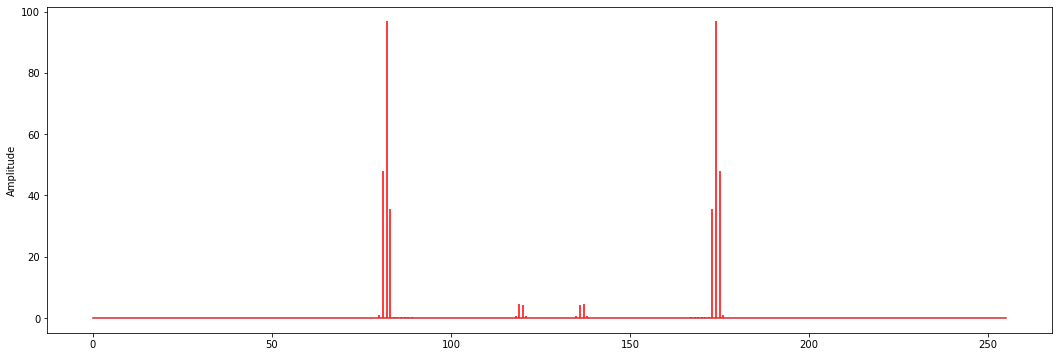

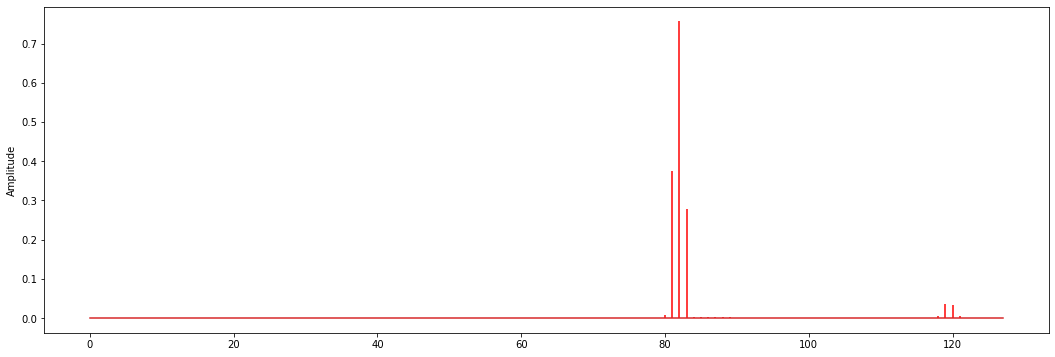

In [6]:
plot_signal(s)

f_s = dft(hamming(s))
plot_freq(abs(f_s))

one_side = len(f_s)//2
plot_freq(abs(f_s[:one_side]/one_side))

Use python package of FFT and implement it with libraires. 

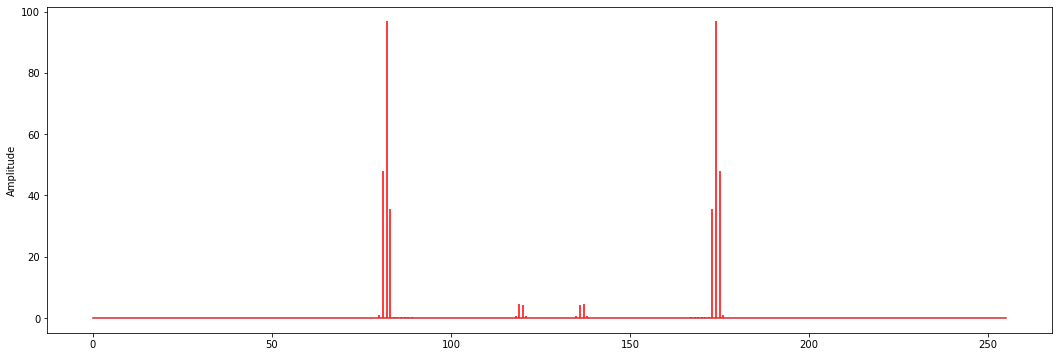

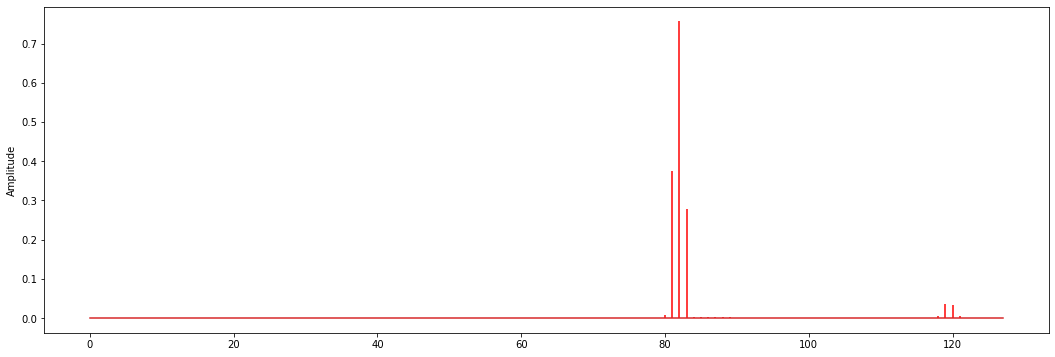

In [7]:
f_S = np.fft.fft(s*np.hamming(N))
plot_freq(abs(f_s))

one_side = len(f_s)//2
plot_freq(abs(f_s[:one_side]/one_side))

Explain the consideration of choosing different windowing. <br/>
```
The purpose of windowing is to mitigate the effects of spectral leakage and improve the signal-to-noise ratio (SNR) of 
the processed signal. 
The choice of the window depends on the goal of the radar we are trying to achieve. 
for example: we will use the hamming window when we want to improve the SNR (because it highlights the big spikes).
```

Do the same for signal with exp(j...) instead of cos.

In [8]:
s = (A/2)*np.exp(1j*2*np.pi*f_d1*n*1.1) + (A/2)*np.exp(-1j*2*np.pi*f_d1*n*1.1) + \
    (B/2)*np.exp(1j*2*np.pi*f_d2*n*1.1) + (B/2)*np.exp(-1j*2*np.pi*f_d2*n*1.1) + 𝜖

C:\Users\User\anaconda3\envs\tt\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


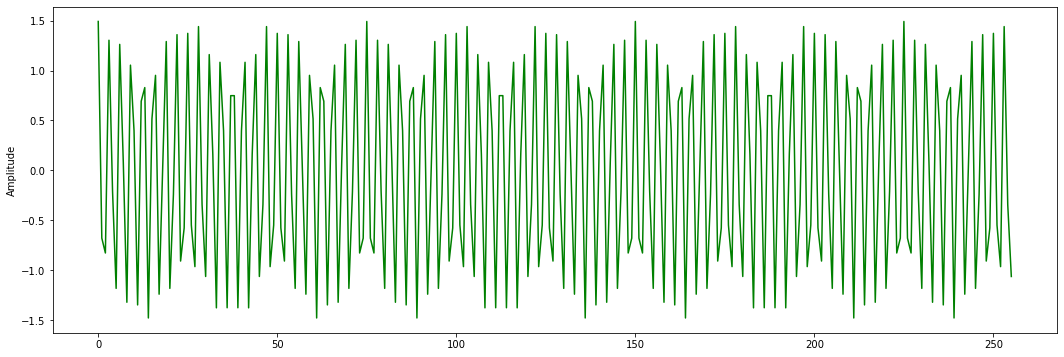

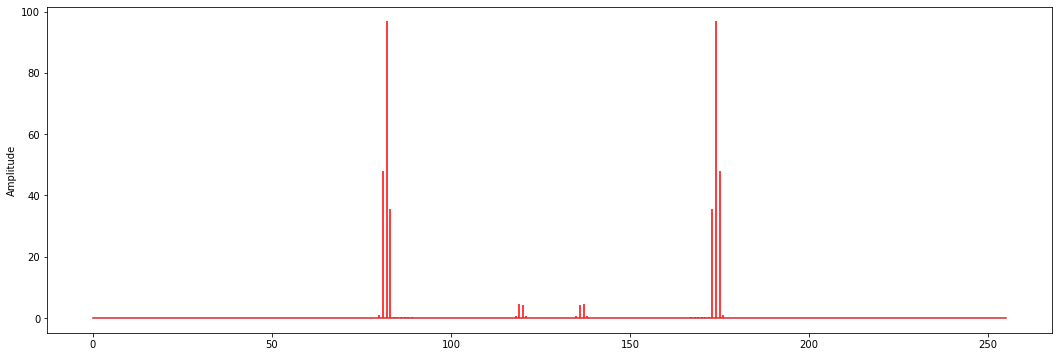

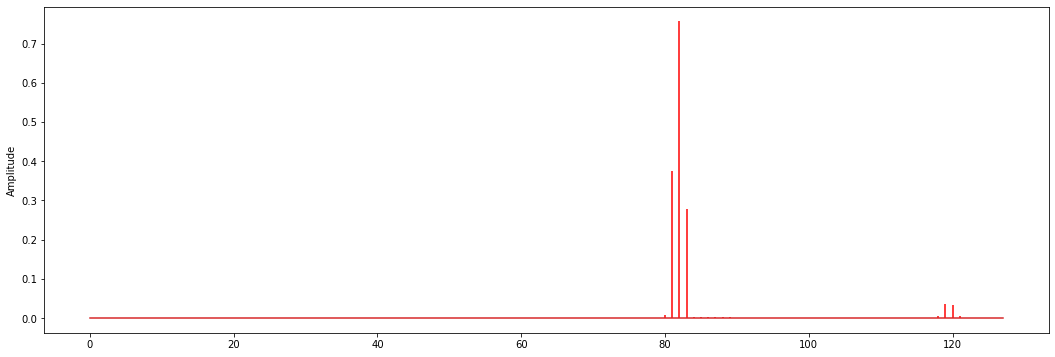

In [9]:
plot_signal(s)

f_s = dft(hamming(s))
plot_freq(abs(f_s))

one_side = len(f_s)//2
plot_freq(abs(f_s[:one_side]/one_side))

Display the results in linear and logarithmic scale(dB)

C:\Users\User\anaconda3\envs\tt\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


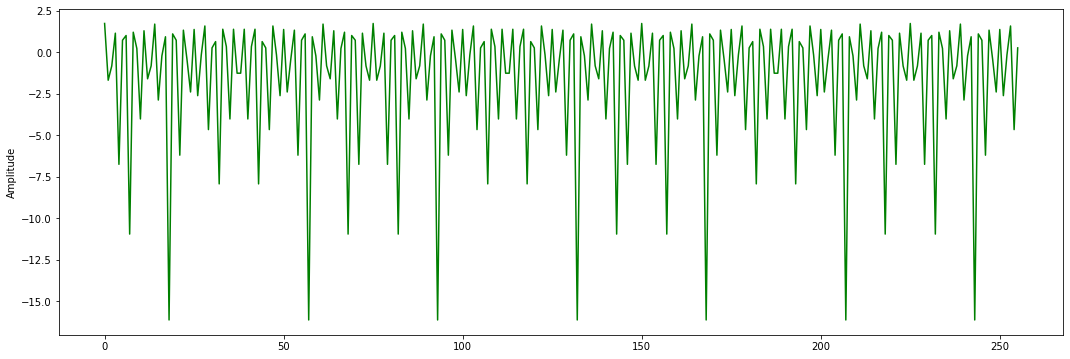

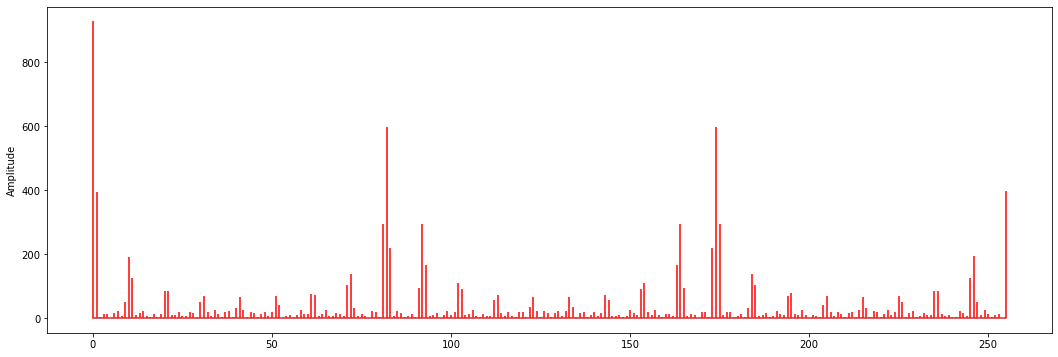

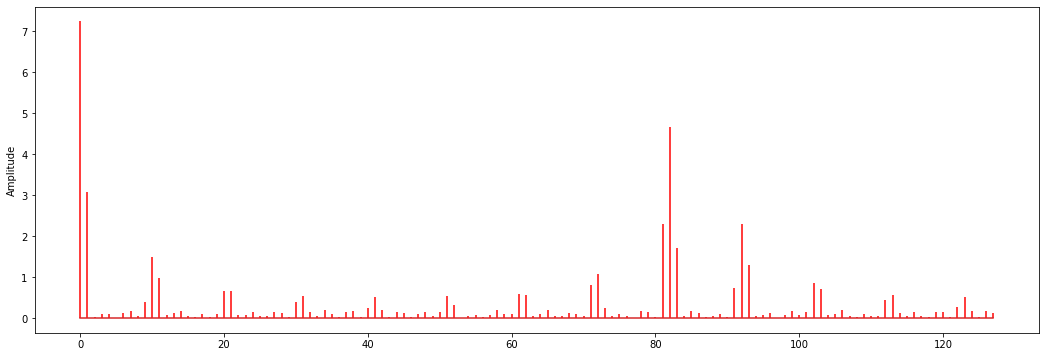

In [10]:
s = linear2db(s)

plot_signal(s)

f_s = dft(hamming(s))
plot_freq(abs(f_s))

one_side = len(f_s)//2
plot_freq(abs(f_s[:one_side]/one_side))

C:\Users\User\anaconda3\envs\tt\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


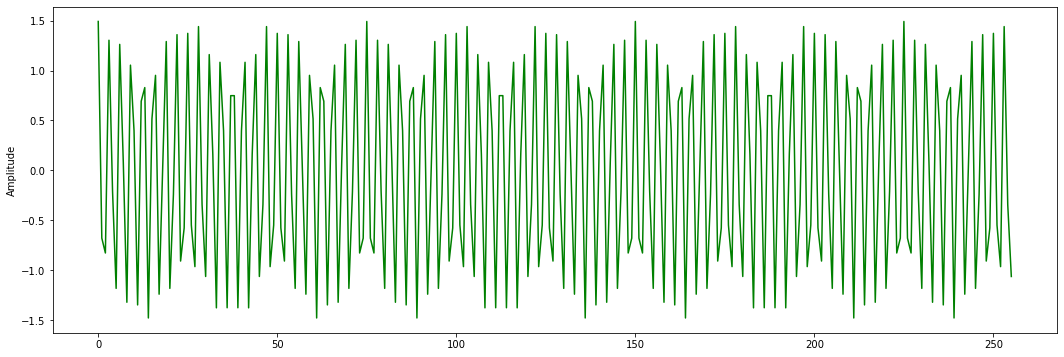

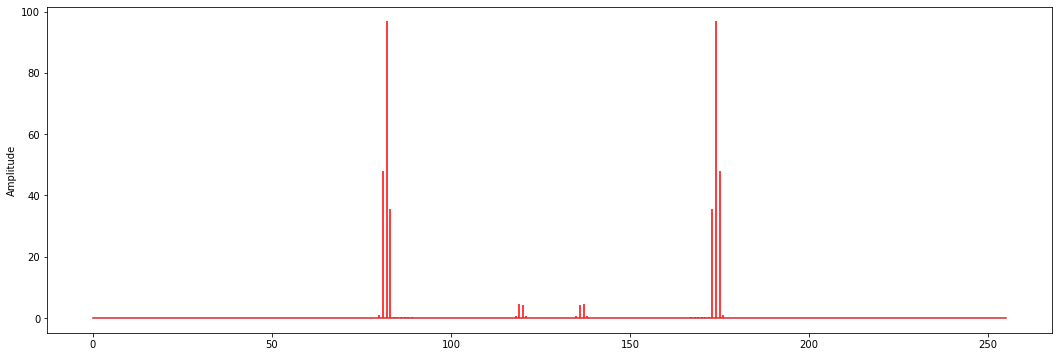

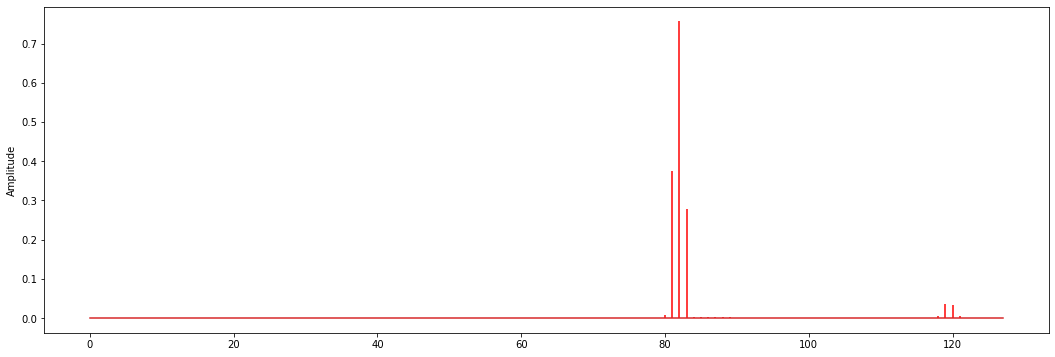

In [11]:
s = db2linear(s)

plot_signal(s)

f_s = dft(hamming(s))
plot_freq(abs(f_s))

one_side = len(f_s)//2
plot_freq(abs(f_s[:one_side]/one_side))

The signal now is:
$Acos(2\pi f_{d_1}nT) + \epsilon_n$ <br/>
The SNR of single measurement is -10dB, <br/>Use python to preform FFT

In [12]:
s = A*np.cos(2*np.pi*f_d1*n*1.1)

SNR = -10
P_signal = np.mean(s**2)
P_noise = P_signal /  db2linear(SNR)

𝜖 = np.sqrt(P_noise) * np.random.randn(N)

In [13]:
s += 𝜖

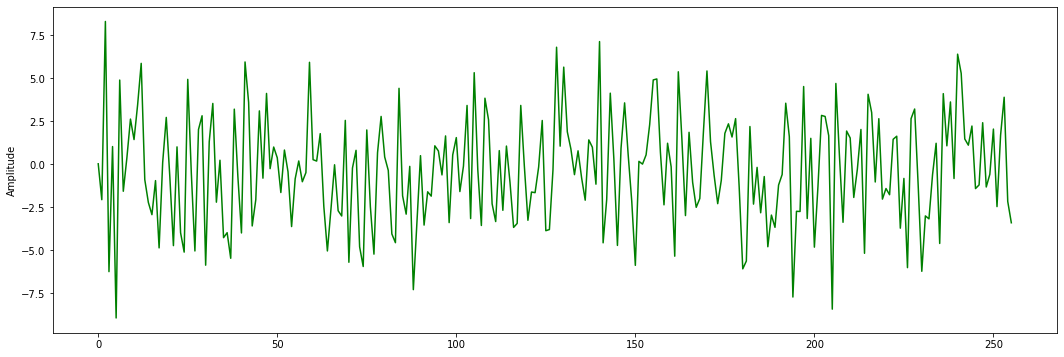

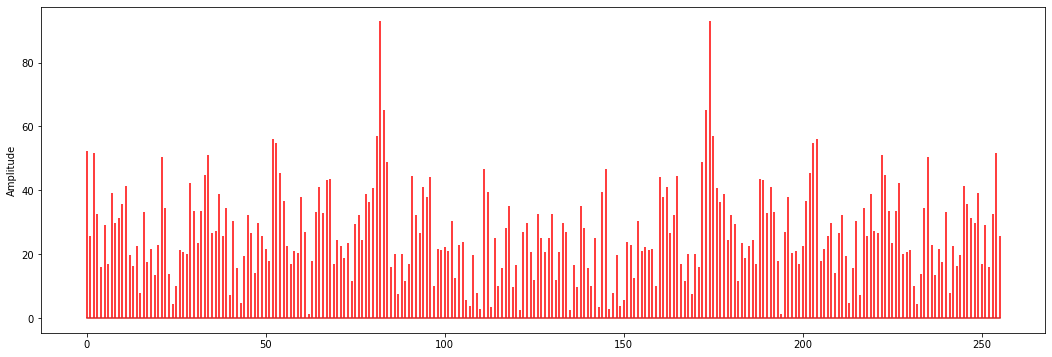

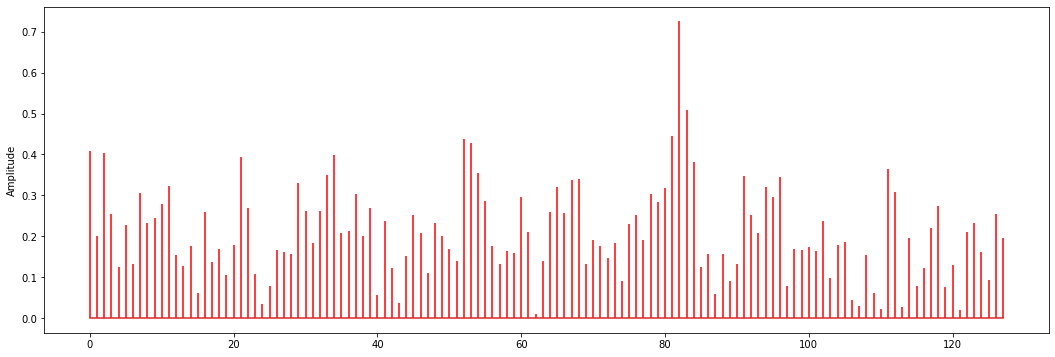

In [14]:
plot_signal(s)

f_s = dft(hamming(s))
plot_freq(abs(f_s))

one_side = len(f_s)//2
plot_freq(abs(f_s[:one_side]/one_side))